In [ ]:
# Add project root to sys.path inside the notebook
import sys
import os
sys.path.append(os.path.abspath(".."))

from src.data_preprocessing import load_data

# View data example
df = load_data()
df.head()

AttributeError: 'function' object has no attribute 'head'

Note: 'value' is measured in kilotons (kt)

## Data Quality:

In [ ]:
# To check null/empty values
df.isnull().sum()

country_code    0
country_name    0
year            0
value           0
dtype: int64

There are no null or missing values.

## Data Analysis:

In [ ]:
df.describe()

,year,value
count,13953.000000,1.395300e+04
mean,1990.732316,8.254983e+05
std,17.187585,2.788923e+06
min,1960.000000,-8.067400e+01
25%,1976.000000,1.100000e+03
50%,1992.000000,1.390000e+04
75%,2006.000000,1.642779e+05
max,2019.000000,3.434401e+07


Let's visualize CO2 by country for the most current year in the dataset.

In [ ]:
df_2019 = df.loc[df['year'] == 2019]
df_2019.head()

,country_code,country_name,year,value
116,AFE,Africa Eastern and Southern,2019,603030.016154
176,AFG,Afghanistan,2019,6079.999924
236,AFW,Africa Western and Central,2019,220740.000024
296,AGO,Angola,2019,25209.999084
356,ALB,Albania,2019,4829.999924


Let's analyze the top 25 contributors to CO2 Emissions in 2019.

In [ ]:
# Sort by the 'Age' column in ascending order
sorted_df_2019 = df_2019.sort_values(by='value')

top_25_2019 = sorted_df_2019.tail(25)
top_25_2019.head()

,country_code,country_name,year,value
8104,MEA,Middle East & North Africa,2019,2.555925e+06
3931,EUU,European Union,2019,2.724970e+06
10873,SAS,South Asia,2019,2.784080e+06
12668,TSA,South Asia (IDA & IBRD),2019,2.784080e+06
3481,ECA,Europe & Central Asia (excluding high income),2019,2.942675e+06


In [ ]:
top_25_2019.describe()

,year,value
count,25.0,2.500000e+01
mean,2019.0,1.140955e+07
std,0.0,8.209078e+06
min,2019.0,2.555925e+06
25%,2019.0,4.817720e+06
50%,2019.0,1.070722e+07
75%,2019.0,1.549953e+07
max,2019.0,3.434401e+07


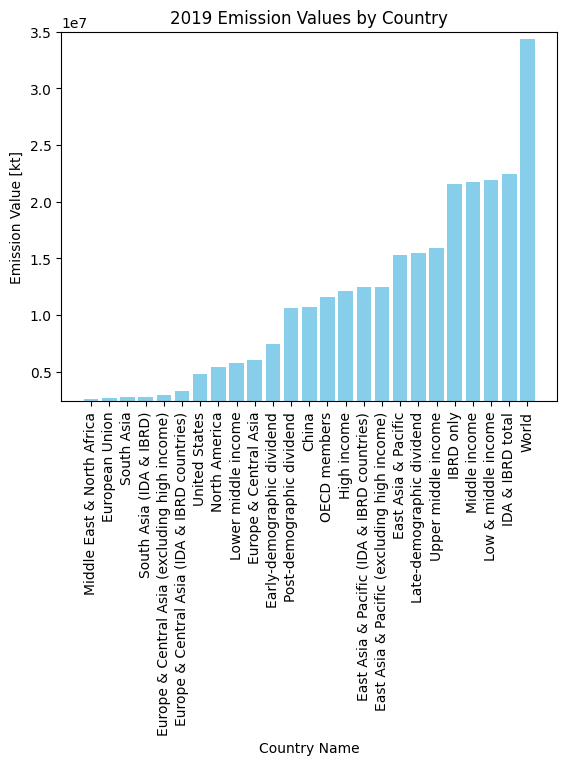

In [ ]:
import matplotlib.pyplot as plt

# Create bar graph
plt.bar(top_25_2019["country_name"], top_25_2019["value"], color='skyblue')

# Add labels and title
plt.xlabel('Country Name')
plt.ylabel('Emission Value [kt]')
plt.title('2019 Emission Values by Country')
plt.ylim(2400000, 35000000)  # Set y-axis range
plt.xticks(rotation=90)  # Rotate x-axis labels to vertical

# Show the graph
plt.show()

Through this viualization, it is clear that there are more than independent countries tracked in this dataset. Let's pull only data on the United States.

In [ ]:
US_data = df.loc[df['country_name'] == "United States"]
US_data.head()

NameError: name 'df' is not defined

In [ ]:
# Remove redundant column(s)
US_data = US_data.drop(['country_code', 'country_name'], axis=1)
US_data.head()

NameError: name 'US_data' is not defined

In [ ]:
US_data.describe()

,year,value
count,60.000000,6.000000e+01
mean,1989.500000,4.733944e+06
std,17.464249,7.568200e+05
min,1960.000000,2.880506e+06
25%,1974.750000,4.457976e+06
50%,1989.500000,4.862075e+06
75%,2004.250000,5.160723e+06
max,2019.000000,5.775810e+06


Text(0.5, 1.0, 'CO2 Emissions (United States)')

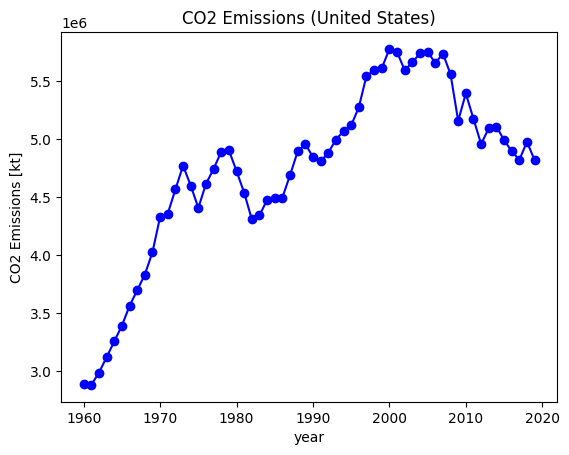

In [ ]:
# Create the line plot
plt.plot(US_data["year"], US_data["value"], label='Line 1', color='blue', linestyle='-', marker='o')

# Add labels and title
plt.xlabel('year')
plt.ylabel('CO2 Emissions [kt]')
plt.title('CO2 Emissions (United States)')